# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.

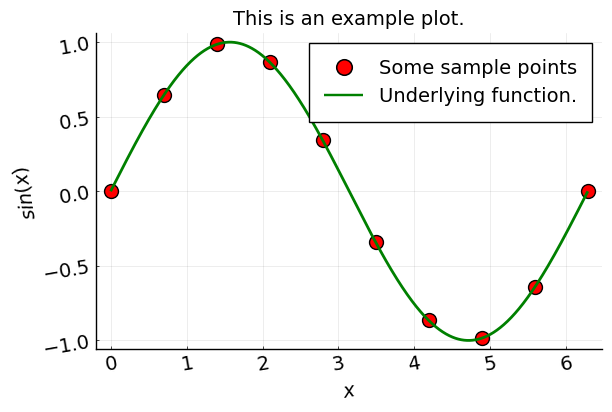

args[group2][parameter3] = 10.0  Type = Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String


In [6]:
using Plots
using LaTeXStrings
pyplot() 

push!(LOAD_PATH, pwd())
include("main.jl")

## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

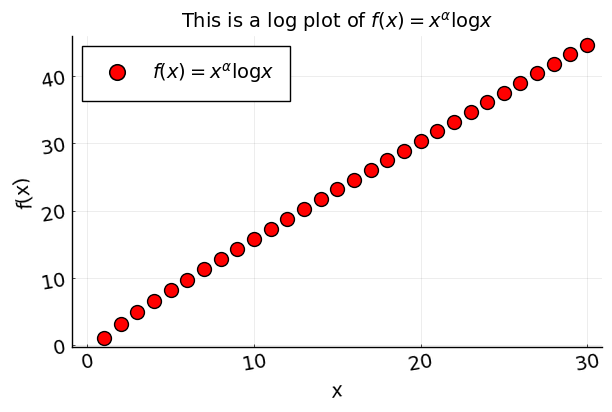

In [2]:
# The function I created in Starter.jl is call new_function, which takes two arguments α and n.
fig = new_function(2, 30) # α=2, n = 30
savefig(fig, "task1.pdf")

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

In [18]:
using Fibonacci
using BenchmarkTools

# The three functions defined are called fibo_recursion, fibo_iteration and fibo_dictmemo.
# These functions take 3 arguments, n, F₀ and F₁.

n_vals = 1:48
times_recursion = zeros(length(n_vals))
println("Test recursion.")
for n in n_vals
    bm = @benchmark fibo_recursion($n)
    times_recursion[n] = median(bm.times)
    println(n, " ", times_recursion[n])
end

Test recursion.
1 0.014
2 2.112
3 4.834
4 10.04004004004004
5 18.95490981963928
6 32.609154929577464
7 57.511156186612574
8 96.32359081419624
9 160.09413202933985
10 262.7613065326633
11 421.5721393034826
12 680.514450867052
13 1103.7
14 1811.6
15 2960.1111111111113
16 4799.0
17 7723.625
18 12344.0
19 20340.0
20 32991.0
21 53481.0
22 88186.0
23 139702.0
24 226596.5
25 366406.0
26 591591.0
27 983523.0
28 1.583981e6
29 2.6092755e6
30 4.1741875e6
31 6.757065e6
32 1.0823698e7
33 1.7364325e7
34 2.80763e7
35 4.5203209e7
36 7.3046022e7
37 1.1806737e8
38 1.91099836e8
39 3.09467284e8
40 5.00178094e8
41 8.25151653e8
42 1.3536508685e9
43 2.230489369e9
44 3.59726628e9
45 5.900364869e9
46 9.453208839e9
47 1.4740061344e10
48 2.3939949496e10


In [19]:
times_iteration = zeros(length(n_vals))
println("Test iteration.")
for n in n_vals
    bm = @benchmark fibo_iteration($n)
    times_iteration[n] = median(bm.times)
    println(n, " ", times_iteration[n])
end

Test iteration.
1 25.071787148594378
2 24.973895582329316
3 26.17168674698795
4 27.23644578313253
5 27.246987951807228
6 29.73969849246231
7 30.521608040201006
8 31.707537688442212
9 33.945674044265594
10 35.299597180261834
11 36.59214501510574
12 38.477341389728096
13 41.34727822580645
14 43.2795156407669
15 41.78203834510595
16 44.5030303030303
17 46.76767676767677
18 49.34984833164813
19 50.280364372469634
20 53.205673758865245
21 55.91522842639594
22 58.01218274111675
23 58.00406504065041
24 61.4415650406504
25 61.89704383282365
26 62.83299389002037
27 64.79826353421859
28 68.44228804902963
29 71.23415132924336
30 72.11873080859775
31 73.03991811668372
32 73.7827868852459
33 75.4224049331963
34 77.64860681114551
35 78.92577319587629
36 81.23037190082644
37 83.10114107883817
38 85.32091097308489
39 89.44114583333334
40 92.55381400208987
41 91.79581151832461
42 93.22216386554622
43 97.3565445026178
44 97.13970588235294
45 99.79078389830508
46 100.72251585623678
47 101.18868921775899


In [20]:
times_dictmemo = zeros(length(n_vals))
println("Test memorization.")
for n in n_vals
    bm = @benchmark fibo_dictmemo($n)
    times_dictmemo[n] = median(bm.times)
    println(n, " ", times_dictmemo[n])
end

Test memorization.
1 106.13838812301167
2 171.57628205128205
3 233.37547169811322
4 294.5801886792453
5 374.63194444444446
6 467.3467336683417
7 580.9791666666666
8 654.7331460674158
9 735.1428571428571
10 949.7
11 1035.2368421052631
12 1121.8
13 1218.0
14 1310.9
15 1408.2
16 1482.6
17 1576.4
18 1554.4
19 1647.8
20 1735.5
21 1806.3
22 1890.3
23 2000.1
24 2073.55
25 2168.5555555555557
26 2288.4444444444443
27 2370.6666666666665
28 2504.0
29 2630.222222222222
30 2730.722222222222
31 2828.5
32 2932.6666666666665
33 3070.0
34 3184.5555555555557
35 3291.0
36 3334.125
37 3484.75
38 3587.375
39 3682.875
40 3751.125
41 3848.75
42 4571.5
43 4629.714285714285
44 4713.285714285715
45 4818.071428571428
46 4913.785714285714
47 4885.714285714285
48 5062.428571428572


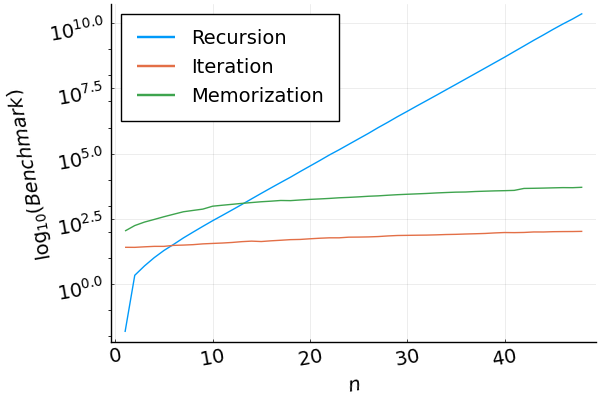

In [21]:
plot(n_vals, times_recursion, yscale=:log10, xlabel=L"n", ylabel=L"\log_{10}(Benchmark)", label="Recursion")
plot!(n_vals, times_iteration, label="Iteration")
plot!(n_vals, times_dictmemo, label="Memorization")

Now, let's say, the task is to compute $F_0, F_1, \cdots, F_48$. Since there are quite a lot of recalculations involved, using memorization is a good choice, but the function needs to be redefined.

In [22]:
fibos = Dict(0 => 0, 1 => 1)

function fibo_newmemo(n)
    if n ∈ keys(fibos)
        return fibos[n]
    else
        result = fibos[n-1] + fibos[n-2]
        fibos[n] = result
        return result
    end
end

fibo_newmemo (generic function with 1 method)

In [23]:
n_vals = 1:48
times_newmemo = zeros(length(n_vals))
println("Test new memorization.")
for n in n_vals
    bm = @benchmark fibo_newmemo($n)
    times_newmemo[n] = median(bm.times)
    println(n, " ", times_newmemo[n])
end

Test new memorization.
1 42.854838709677416
2 41.065524193548384
3 41.099798387096776
4 41.08879919273461
5 41.124117053481335
6 41.08224016145308
7 44.15252525252525
8 42.70534813319879
9 44.27878787878788
10 41.09485368314834
11 41.64026236125126
12 41.9364278506559
13 41.99697275479314
14 43.92078708375378
15 45.508080808080805
16 47.26161616161616
17 45.53333333333333
18 46.773737373737376
19 45.53077699293643
20 45.45206861755802
21 45.656060606060606
22 45.68484848484849
23 45.76717171717172
24 48.70252525252525
25 51.47070707070707
26 54.67983789260385
27 48.81432896064581
28 48.714141414141416
29 50.61515151515152
30 50.69969666329626
31 50.43333333333333
32 48.584848484848486
33 53.02330293819656
34 50.30030333670374
35 56.306990881458965
36 47.83484848484848
37 48.66969696969697
38 48.25529767911201
39 48.79494949494949
40 51.96262626262626
41 56.30628803245436
42 47.30474268415742
43 50.26923076923077
44 47.31969696969697
45 48.494949494949495
46 48.53737373737374
47 47.4010

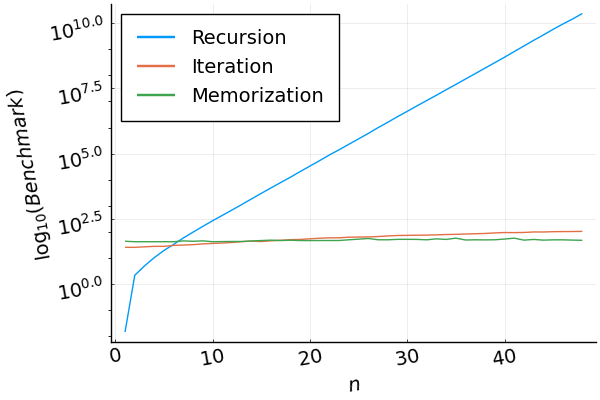

In [24]:
plot(n_vals, times_recursion, yscale=:log10, xlabel=L"n", ylabel=L"\log_{10}(Benchmark)", label="Recursion")
plot!(n_vals, times_iteration, label="Iteration")
plot!(n_vals, times_newmemo, label="Memorization")

The Fibonacci sequence is defined as:

$$
F(n) =
\begin{cases}
0 \qquad &\text{if } x = 0\\
1 \qquad &\text{if } x = 1\\
F(n-1) + F(n-2) \qquad &\text{otherwise}
\end{cases},
$$

so the charateristic equation is 

$$ x^2 - x - 1 = 0.$$

The solution is

$$x_1 = \frac{1+\sqrt{5}}{2} \qquad x_2 = \frac{1-\sqrt{5}}{2}.$$

According to [this page](https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm), we know 

$$ F(n) = a x_1^n + b x_2^n,$$

where $a$ and $b$ are two constants.

Use the initial conditions $F(0) = 0$, $F(1) = 1$, we get

$$
\begin{cases}
a = & \frac{\sqrt{5}}{5}\\
b = & -\frac{\sqrt{5}}{5}
\end{cases}.
$$

Thus, 

$$ F(n) = \frac{\sqrt{5}}{5} \cdot \left( \frac{1+\sqrt{5}}{2} \right)^n - \frac{\sqrt{5}}{5} \cdot \left( \frac{1-\sqrt{5}}{2} \right)^n, $$

which shows that the computational complexity grows at an exponential rate.

In [25]:
function fibo_formula(n)
    term1 = 1/sqrt(5) * ((1+sqrt(5)) / 2)^n
    term2 = 1/sqrt(5) * ((1-sqrt(5)) / 2)^n
    result = term1 - term2
    return result
end 

n_vals = 1:48
times_formula = zeros(length(n_vals))
println("Test the formula.")
for n in n_vals
    bm = @benchmark fibo_formula($n)
    times_formula[n] = median(bm.times)
    println(n, " ", times_formula[n])
end

Test the formula.
1 3.084
2 2.941
3 2.877
4 29.42110552763819
5 29.42613065326633
6 30.019095477386934
7 29.428140703517588
8 29.424120603015076
9 29.42211055276382
10 29.42211055276382
11 29.425125628140705
12 29.425125628140705
13 29.42211055276382
14 29.42211055276382
15 29.424120603015076
16 30.002010050251258
17 29.428140703517588
18 30.039195979899496
19 30.039195979899496
20 30.036180904522613
21 30.037185929648242
22 30.071356783919597
23 30.018090452261305
24 30.04321608040201
25 30.067336683417086
26 30.031155778894473
27 29.425125628140705
28 29.424120603015076
29 29.424120603015076
30 29.424120603015076
31 29.423115577889448
32 29.42613065326633
33 29.452261306532662
34 30.040201005025125
35 30.044221105527637
36 29.44824120603015
37 30.01608040201005
38 29.439195979899498
39 30.031155778894473
40 30.042211055276383
41 30.056281407035176
42 29.424120603015076
43 29.430150753768846
44 29.429145728643217
45 29.445226130653268
46 30.066331658291457
47 30.06338028169014
48 29.4

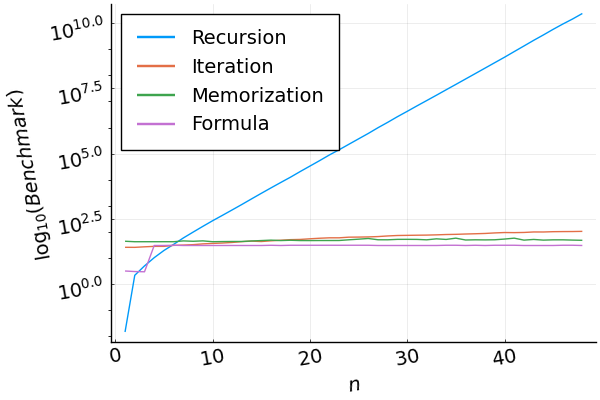

In [26]:
plot(n_vals, times_recursion, yscale=:log10, xlabel=L"n", ylabel=L"\log_{10}(Benchmark)", label="Recursion")
plot!(n_vals, times_iteration, label="Iteration")
plot!(n_vals, times_newmemo, label="Memorization")
plot!(n_vals, times_formula, label="Formula")

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

Let $n = 2^p$ and $a_p = F(2^p)$, then the two problems above can be transformed into

$$
a_p = 8 a_{p-1} + 4 \cdot 2^{2p-2} \quad \text{with} \quad a_0 = 1
$$

and 

$$ 
a_p = 7 a_{p-1} +  18 \cdot 2^{2p-2} \quad \text{with} \quad a_0 = 1.
$$

The general solution to $a_p = 8a_{p-1}$ is $a_p = c_1 \cdot 8^p$. Now, suppose $\alpha_p = c_2 \cdot 2^{2p-2}$ is a particular solution, then it must satisfy

$$
\begin{align*}
c_2 \cdot 2^{2p-2} & = 8 c_2 \cdot 2^{2p - 4} + 4 \cdot 2^{2p-2} \\ 
c_2 & = 8 c_2 2^{-2} + 4 \\ 
c_2 & = 2 c_2 + 4 \\ 
c_2 & = -4
\end{align*}
$$

Thus, we konw $\alpha_p = -4 \cdot 2^{2p-2} = - 2^{2p} = -4^p$, and as a result, the general solution to $a_p = 8 a_{p-1} + 4 \cdot 2^{2p-2}$ is $a_p = c_1 \cdot 8^p -4^{p}$. By $a_0 = 1$, we know $c_1 = 2$. Therefore, the solution is $a_p = 2 \cdot 8^p - 4^p$. 

Plug in $p = \log_2 n$, we get
$$
\begin{align*}
F(n) = & 2 \cdot 2^{3 \log_2 n} - 2^{2 \log_2 n} \\ 
= & 2 \cdot 2^{\log_2 n^3} - 2^{\log_2 n^2} \\
= & 2n^3 - n^2,
\end{align*}
$$

which means the computational complexity of the naive divide-and-conquer algorithm for matrix multiplication is $O(n^3)$.

The general solution to $a_p = 7 a_{p-1}$ is $a_p = c_1 7^p$. Now, suppose $\alpha_p = c_2 \cdot 2^{2p-2}$ is a particular solution, then it must satisfy

$$
\begin{align*}
c_2 \cdot 2^{2p-2} & = 7 c_2 \cdot 2^{2p - 4} + 18 \cdot 2^{2p-2} \\ 
c_2 & = 7 c_2 2^{-2} + 18 \\ 
c_2 & = \frac{7}{4} c_2 + 18 \\ 
c_2 & = -24
\end{align*}
$$

Thus, we konw $\alpha_p = -24 \cdot 2^{2p-2} = -6 \cdot 2^{2p} = -6 \cdot 4^p$, and as a result, the general solution to $a_p = 7 a_{p-1} + 18 \cdot 2^{2p-2}$ is $a_p = c_1 \cdot 7^p -6 \cdot 4^{p}$. By $a_0 = 1$, we know $c_1 = 7$. Therefore, the solution is $a_p = 7 \cdot 7^p - 6 \cdot 4^p$. 

Plug in $p = \log_2 n$, we get
$$
\begin{align*}
F(n) = & 7 \cdot 7^{ \log_2 n} - 6^{2 \log_2 n} \\ 
= & 7 \cdot 7^{(\log_7 n / \log_7 2} - 6^{\log_2 n^2} \\
= & 7 \cdot n^{\frac{1}{\log_7 2}} - 6 \cdot n^2 \\  
= & 7 \cdot n^{\log_2 7} - 6 \cdot n^2
\end{align*}
$$

which means the computational complexity of the naive divide-and-conquer algorithm for matrix multiplication is $O(n^{\log_2 7})$.